# Homework 2. Numpy and matplotlib

***Double Click here to edit this cell***

- Name: 김현동
- Student ID: 201901208
- Submission date: 2023-04-07

## Remark. If any kind of loops including for-loop, while-loops, list comprehension, and other loops are found, you get no points (0점). 

## Use numpy wherever it is possible. 


## Total: 65 pts

## Problem 1 (5 pts)

- The centroid of a finite set of $\displaystyle {k}$ points $\displaystyle \mathbf {x} _{1},\mathbf {x} _{2},\ldots ,\mathbf {x} _{k}$ in $\displaystyle \mathbb {R} ^{n}$ is
$$
\mathbf {C} ={\frac {\mathbf {x} _{1}+\mathbf {x} _{2}+\cdots +\mathbf {x} _{k}}{k}}
$$

- This point minimizes the sum of squared Euclidean distances between itself and each point in the set.
- Compute centroid
- Plot dataset and centroid 

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

def plot_centroid(data):
    
# YOUR CODE MUST BE HERE
    plt.plot(data[:,0], data[:,1],'o')
    centroid = np.mean(data, axis=0)
    plt.plot(centroid[0], centroid[1],'s',color='red')
    plt.show()

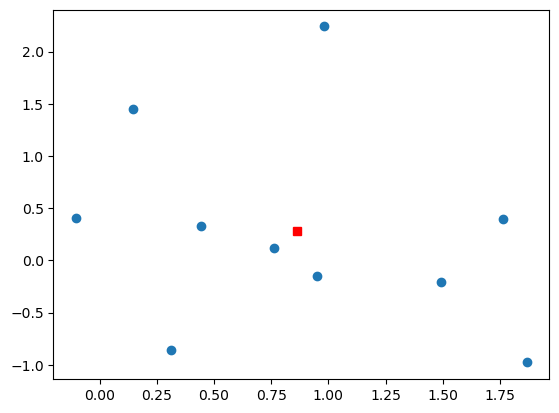

In [2]:
# DO NOT EDIT THIS CELL
np.random.seed(0)
data = np.random.randn(10,2)
plot_centroid(data)

**You output must be:**

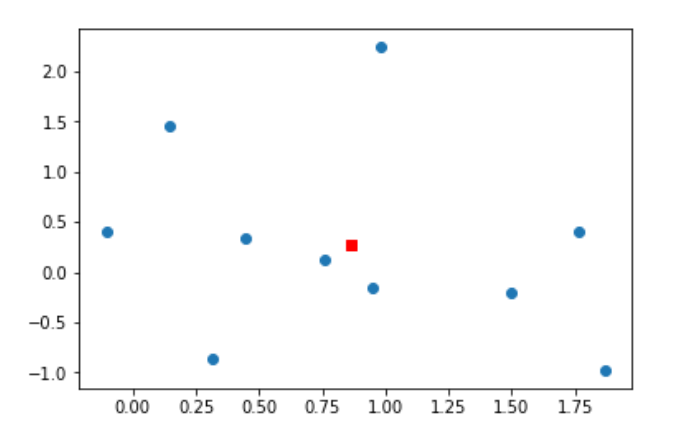

## Problem 2 (10 pts)

- Let $\textstyle x_{1},x_{2},\cdots ,x_{n}$ be a set of $\textstyle n$ points in a space with a distance function $d$. 
- Medoid is defined as
$$
x_{\text{medoid}} = \text{argmin}_{y \in \{x_1, x_2, \cdots, x_n\}} \sum_{i=1}^{n}d(y, x_i)
$$
- Compute medoid using Euclidean distance as a distance function.
- Plot dataset and medoid
- *Do not use sklearn, scipy or any module computing distance matrix directly*
- Use numpy functions only

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

def plot_medoid(data):
    
# YOUR CODE MUST BE HERE

    plt.plot(data[:,0],data[:,1],'o')
    
    """
    자료가 짝수인 경우 중간값은 평균값으로 출력.
    평균값에 가장 가까운 값을 구함으로써 문제 해결.
    """ 
    centroid = np.mean(data,axis=0)
    distances = np.sqrt(np.sum((data-centroid)**2,axis=1))
    medoid = data[np.argmin(distances)]
    

    plt.plot(medoid[0],medoid[1],'s',color='red')
    
    plt.show()

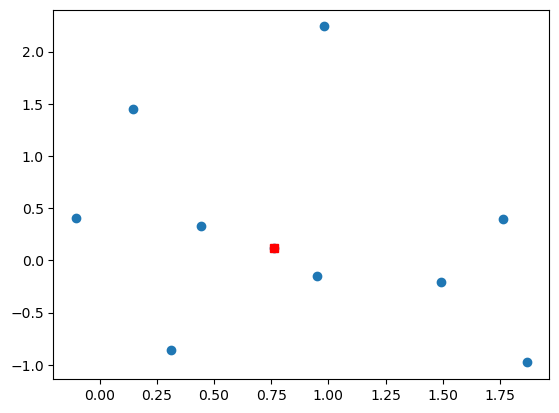

In [4]:
# DO NOT EDIT THIS CELL
np.random.seed(0)
data = np.random.randn(10,2)
plot_medoid(data)

**You output must be:**

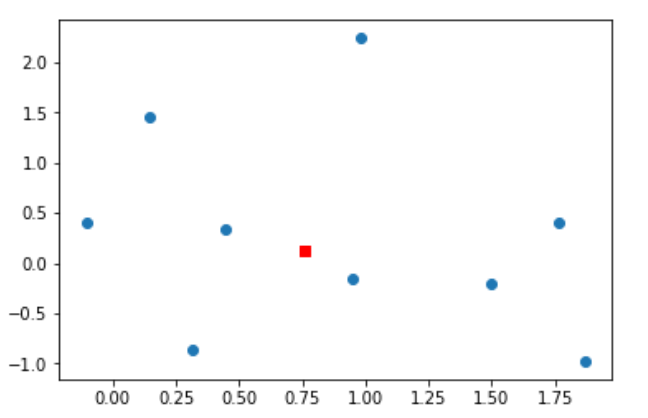

## Sample code

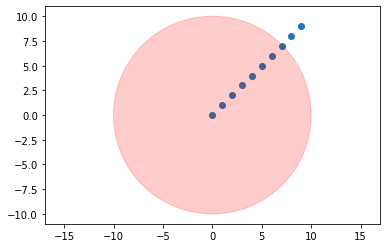

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

def sample_code():
    x = np.arange(10)
    y = np.arange(10)
    center = (0, 0)
    radius = 10
    plt.scatter(x, y)
    ax = plt.gca()
    ax.add_patch(plt.Circle(center, radius, color='r', alpha=0.2))
    plt.axis('equal')
    plt.show()
    
sample_code()

## Problem 3 (5 pts)

- We want to draw a scatter plot using **data**
- Plot the center using a green square symbol
- Plot points inside **radius** from center using red dots
- Plot points out of the **radius** from center using 'C0' colored dots
- Draw a filled circle centered at **center** using red color and alpha=0.2

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

def points_within_radius(data, center, radius):

# YOUR CODE MUST BE HERE
    
    distances = np.sqrt(np.sum((data-center)**2,axis=1))
    
    #center point
    plt.scatter(center[0],center[1],color='green',marker='s',s=50)
    
    #all point- finailly outside point
    plt.scatter(data[:,0],data[:,1], color='C0')
    
    #inside point 
    in_radius = data[distances<=radius]
    plt.scatter(in_radius[:,0],in_radius[:,1], color='r')
    
    #circle
    ax = plt.gca()
    ax.add_patch(plt.Circle(center, radius, color='r', alpha=0.2))
    plt.axis('equal')
    plt.show()

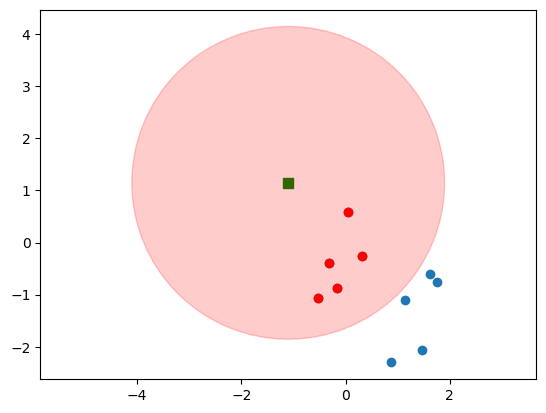

In [6]:
# DO NOT EDIT THIS CELL
np.random.seed(1)
data = np.random.randn(10,2)
radius = 3.0
center = np.random.randn(2)
points_within_radius(data, center, radius)

**You output must be:**

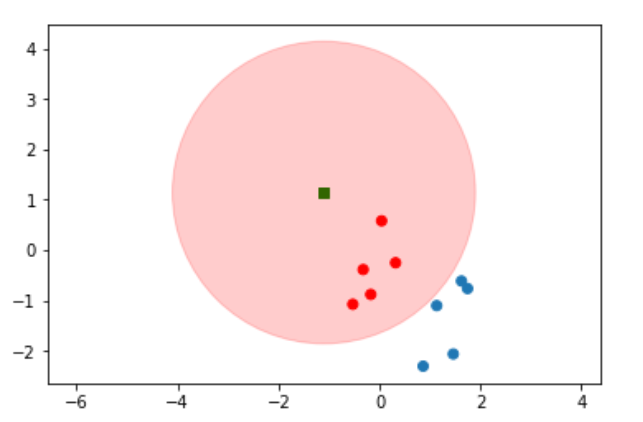

## Problem 4 (10 pts)

- We want to find k nearest points from the center
- Plot the center using a green square symbol
- Plot k-nearest points from center using red dots
- Plot other points using 'C0' colored dots
- Draw a filled circle centered at **center** using red color and alpha=0.2
- *Do not use sklearn, scipy or any module computing k-nearest points directly*
- Use numpy functions only

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

def points_k_nearest(data, center, k=1):
    
# YOUR CODE MUST BE HERE
    #center point
    plt.scatter(center[0],center[1],color='green',marker='s',s=50)
    
    #all point
    plt.scatter(data[:,0],data[:,1], color='C0')
    
    
    """
    inside point
    
    distances의 mean보다 작은 값들로 설정.
    """
    distances = np.sqrt(np.sum((data-center)**2,axis=1))
    nearest_index = np.argsort(distances)[:k]
    nearest_distances = distances[nearest_index]
    nearest = np.where(distances <= np.max(nearest_distances))[0]
    plt.scatter(data[nearest][:,0],data[nearest][:,1], color='r')
    
    
    #circle

    far_index = np.argmax(distances[nearest])
    far_point = data[nearest[far_index]]
    radius = np.sqrt(np.sum((far_point-center)**2))
    
    ax = plt.gca()
    ax.add_patch(plt.Circle(center, radius, color='r', alpha=0.2))
    plt.axis('equal')
    plt.show()

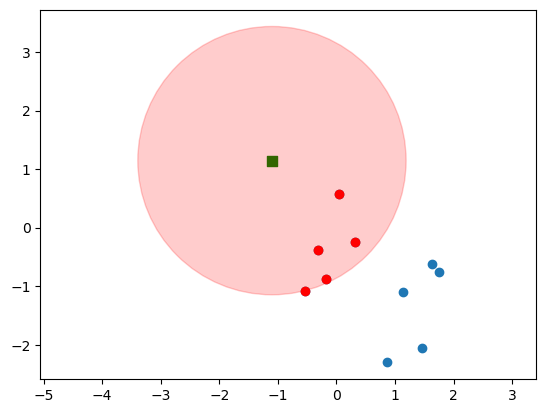

In [8]:
# DO NOT EDIT THIS CELL
np.random.seed(1)
data = np.random.randn(10,2)
k = 5
center = np.random.randn(2)
points_k_nearest(data, center, k)

**You output must be:**

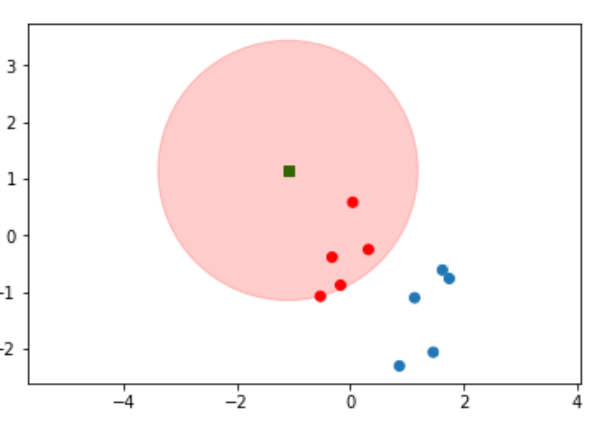

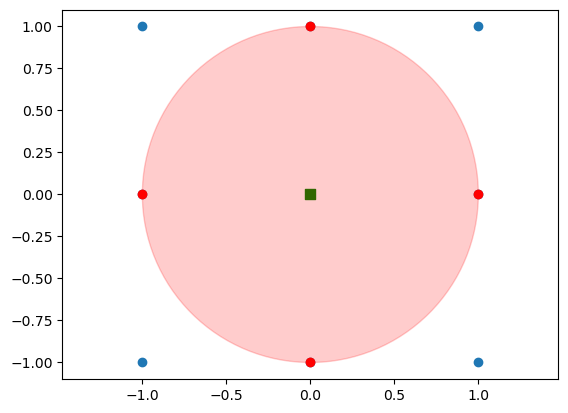

In [9]:
# DO NOT EDIT THIS CELL
np.random.seed(1)
data = np.array([[1.,0.],[0.,1.],[-1.,0.],[0.,-1.],[1.,1.],[1.,-1.],[-1.,1.],[-1.,-1.]])
np.random.shuffle(data)
k = 1
center = np.array([0.,0.])
points_k_nearest(data, center, k)

**You output must be:**

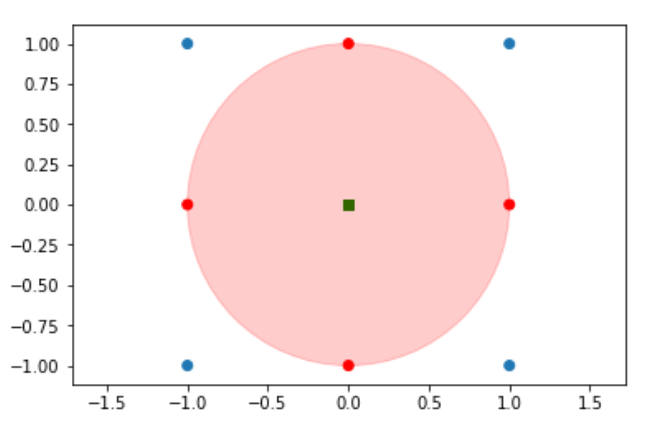

## Problem 5 (15 pts)

- **find_k_nearest_index** returns the index of the k-nearest
- We want to time the execution
- *Do not use sklearn, scipy or any module computing k-nearest points directly*
- Use numpy functions only

In [10]:
import numpy as np

def find_k_nearest_index(data, center, k=1):

# YOUR CODE MUST BE HERE
    distances = np.sqrt(np.sum((data-center)**2,axis=1))

    nearest_index = np.argpartition(distances, k)[:k]
    nearest = np.where(distances <= np.max(distances[nearest_index]))[0]
    return np.sort(nearest)

In [11]:
# DO NOT EDIT THIS CELL

np.random.seed(0)
data = np.array([[1.,0.],[0.,1.],[-1.,0.],[0.,-1.],[1.,1.],[1.,-1.],[-1.,1.],[-1.,-1.]])
np.random.shuffle(data)
k = 1
center = np.array([0.,0.])
print(find_k_nearest_index(data, center, k))

[1 2 4 5]


**You output must be:**
```
[1 2 4 5]
```

In [12]:
# DO NOT EDIT THIS CELL

import time

np.random.seed(100)
data = np.random.randn(10000000,20)   # 10 million data
k = 5
center = np.random.randn(20)
start = time.time()
print(find_k_nearest_index(data, center, k))
end = time.time()

lapse = end - start
total = 15
weight = 1.5
grace = 3.0
my_point = int(total / (weight ** (lapse // grace)))
print(f'Total time taken : {lapse} seconds')
print(f'My point is {my_point}')

[1664998 3042821 3307688 3848441 5351099]
Total time taken : 2.982499599456787 seconds
My point is 15


**You output must be:**
```
[1664998 3042821 3307688 3848441 5351099]
```
**Your time must be around:**
```
[1664998 3042821 3307688 3848441 5351099]
Total time taken : 1.2571053504943848 seconds
My point is 15
```

## Problem 6 (20 pts)

- **find_k_nearest_index_big** returns the index of the k-nearest for 50 million data
- We want to time the execution
- *Do not use sklearn, scipy or any module computing k-nearest points directly*
- Use numpy functions only

In [13]:
import numpy as np

def find_k_nearest_index(data, center, k=1):

# YOUR CODE MUST BE HERE
    distances = np.sqrt(np.sum((data-center)**2,axis=1))

    nearest_index = np.argpartition(distances, k)[:k]
    nearest = np.where(distances <= np.max(distances[nearest_index]))[0]
    return np.sort(nearest)
def find_k_nearest_index_big(data, center, k=1):

# YOUR CODE MUST BE HERE
    block_size = 100000
    num_blocks = len(data) // block_size
    blocks = np.array_split(data, num_blocks)
    
    nearest_blocks = np.array(list(map(lambda x: find_k_nearest_index(x,center,k),blocks)))
    nearest_blocks = np.concatenate(nearest_blocks) + np.repeat(np.arange(num_blocks) * block_size, k)
    distances = np.sqrt(np.sum((data[nearest_blocks] - center) ** 2, axis=1))
    nearest = nearest_blocks[np.argpartition(distances, k)[:k]]
    return np.sort(nearest)

In [14]:
# DO NOT EDIT THIS CELL

import time

np.random.seed(100)
data = np.random.randn(20000000,20)   # 20 million data
k = 5
center = np.random.randn(20)
start = time.time()
print(find_k_nearest_index_big(data, center, k))
end = time.time()

lapse = end - start
total = 5
weight = 1.5
grace = 10
my_point = int(total / (weight ** (lapse // grace)))
print(f'Total time taken : {lapse} seconds')
print(f'My point is {my_point}')

[ 4094227  5059674  7945485 12835405 18013546]
Total time taken : 6.2159504890441895 seconds
My point is 5


**Your time must be around:**
```
[ _____________________________________________ ]
Total time taken : 3.840811252593994 seconds
My point is 5
```

In [15]:
# DO NOT EDIT THIS CELL

import time

np.random.seed(100)
data = np.random.randn(30000000,20)   # 30 million data
k = 5
center = np.random.randn(20)
start = time.time()
print(find_k_nearest_index_big(data, center, k))
end = time.time()

lapse = end - start
total = 5
weight = 1.5
grace = 300
my_point = int(total / (weight ** (lapse // grace)))
print(f'Total time taken : {lapse} seconds')
print(f'My point is {my_point}')

[ 5594529  9743426 16101792 17966020 26121068]
Total time taken : 9.011407613754272 seconds
My point is 5


**Your time must be around:**
```
[ _____________________________________________ ]
Total time taken : 81.23930025100708 seconds
My point is 5
```

In [16]:
# DO NOT EDIT THIS CELL

import time

np.random.seed(100)
data = np.random.randn(50000000,20)   # 50 million data
k = 5
center = np.random.randn(20)
start = time.time()
print(find_k_nearest_index_big(data, center, k))
end = time.time()

lapse = end - start
total = 10
weight = 1.5
grace = 500
my_point = int(total / (weight ** (lapse // grace)))
print(f'Total time taken : {lapse} seconds')
print(f'My point is {my_point}')

[ 7095946 12357774 16298750 17671994 37962997]
Total time taken : 14.137678861618042 seconds
My point is 10


**Your time must be around:**
```
[ _____________________________________________ ]
Total time taken : 195.7096507549286 seconds
My point is 10
```

## Ethics:
If you cheat, you will get negatgive of the total points.
If the homework total is 22 and you cheat, you get -22.

## What to submit

- Run **all cells** after restarting the kernel
- Goto "File -> Print Preview"
- Print the page as pdf
- Submit the pdf file in google classroom
- Pdf file name must be in a form of: homework_2_홍길동_202300001.pdf
- No late homeworks will be accepted
- Your homework will be graded on the basis of correctness, performance, and programming skills